In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL of the website
url = "https://www.cancercareontario.ca/en/statistical-reports/ontario-cancer-statistics-2020/ch-6-cancer-mortality-rates-trends#:~:text=Males%20have%20a%20greater%20chance,1%20in%204%20(23.5%25)"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all <fieldset> tags on the page
fieldsets = soup.find_all('fieldset')

# Initialize an empty list to store table data
table_data = []

# Iterate over fieldsets to find the one containing the table
for fieldset in fieldsets:
    table = fieldset.find('table')
    if table:
        # Extract the table rows
        rows = table.find_all('tr')
        
        # Iterate over rows and append data to table_data
        for row in rows:
            # Extract columns from each row
            columns = row.find_all(['td', 'th'])
            row_data = [col.get_text(strip=True) for col in columns]
            table_data.append(row_data)
        break  # Exit loop once the table is found

# Create DataFrame
df = pd.DataFrame(table_data[1:], columns=table_data[0])

# Display the first few rows of the DataFrame
df.head()


,CAUSE OF DEATHS,Number of deaths,PERCENTAGE OF DEATHS
0,All other causes,36651,36.9%
1,Cancer (malignant neoplasms),29139,29.3%
2,Diseases of heart,19290,19.4%
3,Cerebrovascular diseases,5123,5.2%
4,Accidents (unintentional injuries),5073,5.1%


In [2]:
# Save the DataFrame to a CSV file
df.to_csv('cancer_statistics.csv', index=False)

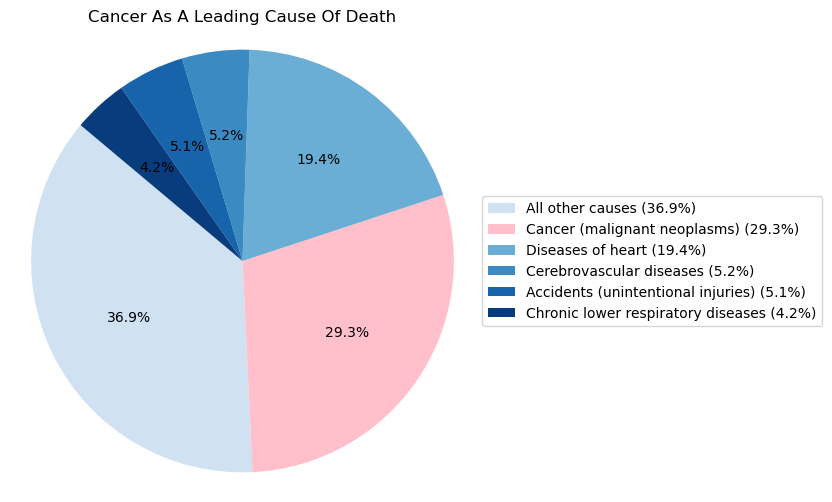

In [3]:
# Iterate over fieldsets to find the one containing the table
for fieldset in fieldsets:
    table = fieldset.find('table')
    if table:
        # Extract the table rows
        rows = table.find_all('tr')
        
        # Initialize lists to store data
        labels = []
        values = []

        # Iterate over rows and extract the data
        for row in rows[1:]:  # Skip the header row
            columns = row.find_all(['td', 'th'])
            label = columns[0].get_text(strip=True)
            value = float(columns[1].get_text(strip=True).replace(',', ''))
            labels.append(label)
            values.append(value)

        # Calculate percentages
        total = sum(values)
        percentages = [(value / total) * 100 for value in values]

        # Create color gradient
        colors = [plt.cm.Blues(0.2 + i * 0.15) if label != 'Cancer (malignant neoplasms)' else 'pink' for i, label in enumerate(labels)]

        # Create pie chart
        plt.figure(figsize=(6, 6))
        patches, _, _ = plt.pie(values, colors=colors, startangle=140, autopct='%1.1f%%')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title('Cancer As A Leading Cause Of Death')
        
        # Add legend outside the chart
        legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(labels, percentages)]
        plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

        plt.show()
        break  # Exit loop once the table is found


In [4]:
# Find all <table> elements
tables = soup.find_all("table")

# Check if tables are found and if there are at least three tables
if len(tables) >= 3:
    # Get the third table
    third_table = tables[2]

    # Extracting data from the table
    data = []
    for row in third_table.find_all("tr"):
        # Extracting data from each row
        cols = row.find_all(["th", "td"])
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Remove header row
    data = data[1:]

    # Convert data to DataFrame
    df = pd.DataFrame(data, columns=["Cancer Types", "Males (%)", "Females (%)"])

    # Clean the DataFrame
    df_cleaned = df.replace('n/a', pd.NA)  
    df_cleaned = df_cleaned.dropna()  
    
    # Display the cleaned DataFrame
    print("MORTALITY BY SEX AND CANCER TYPE:")
    print(df_cleaned)
    print("========================")
    
      

MORTALITY BY SEX AND CANCER TYPE:
             Cancer Types Males (%) Females (%)
0                    Lung      23.1        23.7
2              Colorectal      11.0        10.4
4                Pancreas       6.6         6.4
5                   Liver       4.9         3.0
8                Leukemia       4.2         3.3
9                 Bladder       4.1         1.8
10              Esophagus       3.9         1.3
11   Non-Hodgkin lymphoma       3.6         3.4
12                Stomach       3.2         2.0
13                  Brain       3.2         2.6
14  Oral cavity & pharynx       2.5         1.2
15                 Kidney       2.4         1.5
16               Melanoma       2.2         1.3
17                Myeloma       2.1         1.8
19                 Larynx       0.7         0.2
20                Thyroid       0.3         0.4
21       Hodgkin lymphoma       0.2         0.1
23        All other types      11.4        11.5


In [5]:
# Save the DataFrame to a CSV file
df.to_csv('cancer_mortality_statistics.csv', index=False)

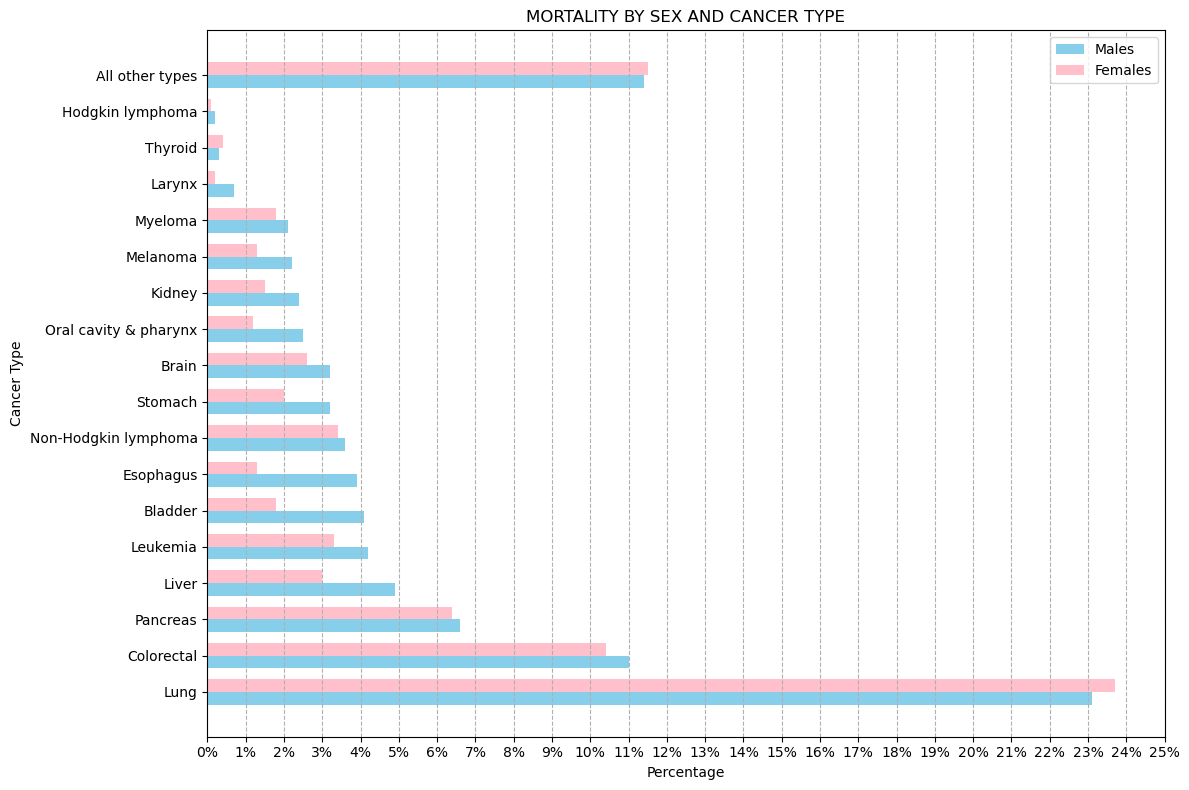

In [6]:
 # Data for plotting
y = df_cleaned["Cancer Types"]  # This represents the cancer types
x_males = df_cleaned["Males (%)"].astype(float)  # Convert to float
x_females = df_cleaned["Females (%)"].astype(float)  # Convert to float

# Plotting the grouped bar graph with grid lines
plt.figure(figsize=(12, 8))

# Define the width of each bar
bar_width = 0.35

# Define the positions for the bars
index = np.arange(len(y))

# Plot bars for males
plt.barh(index, x_males, bar_width, color='skyblue', label='Males')

# Plot bars for females
plt.barh(index + bar_width, x_females, bar_width, color='pink', label='Females')

# Adding title and labels
plt.title('MORTALITY BY SEX AND CANCER TYPE')
plt.xlabel('Percentage')
plt.ylabel('Cancer Type')

# Set the y-axis ticks
plt.yticks(index + bar_width / 2, y)

# Set the x-axis ticks and labels
plt.xticks(np.arange(0, 26, step=1), [f"{i}%" for i in range(0, 26)])

plt.grid(axis='x', linestyle='--')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [7]:
# Check if tables are found and if there are at least five tables
if len(tables) >= 5:
    # Get the fifth table
    fifth_table = tables[4]

    # Extracting data from the table
    data = []
    for row in fifth_table.find_all("tr"):
        # Extracting data from each row
        cols = row.find_all(["th", "td"])
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Remove header row
    data = data[1:]

    # Convert data to DataFrame
    df = pd.DataFrame(data, columns=["Cancer Types", "Both Sexes(Age)", "Males(Age)", "Females(Age)"]) 
    # Clean the DataFrame
    df_cleaned = df.replace('n/a', pd.NA) 
    df_cleaned = df_cleaned.dropna()
    
    # Display DataFrame
    print("Mortality By Age:")
    print(df_cleaned)

    # Save DataFrame to a CSV file
    df_cleaned.to_csv("Mortality_By_Age_data.csv", index=False)

Mortality By Age:
             Cancer Types Both Sexes(Age) Males(Age) Females(Age)
1             All cancers              74         74           74
2                 Bladder              81         80           82
3                   Brain              65         64           67
6              Colorectal              77         75           79
7               Esophagus              71         70           74
8        Hodgkin lymphoma              72         69           75
9                  Kidney              74         72           78
10                 Larynx              74         73           76
11               Leukemia              76         76           77
12                  Liver              72         70           74
13                   Lung              73         73           73
14               Melanoma              73         73           72
15                Myeloma              76         75           77
16   Non-Hodgkin lymphoma              76         74      

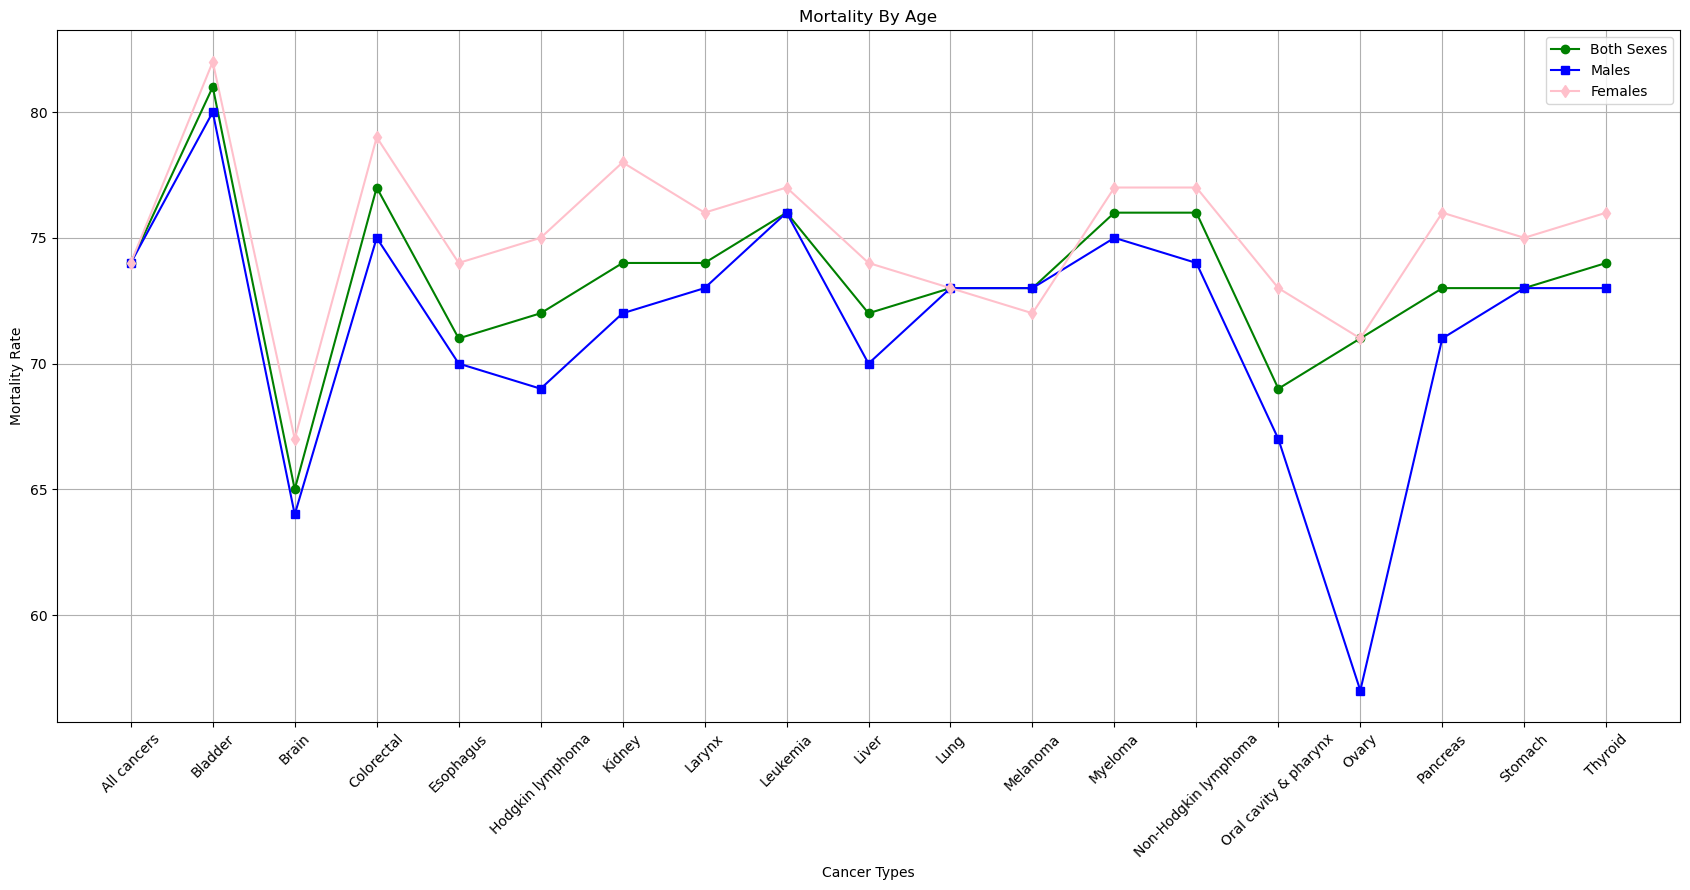

In [10]:
#data from the CSV file
df = pd.read_csv("Mortality_By_Age_data.csv")

#Convert numeric columns to numeric type
df[['Both Sexes(Age)', 'Males(Age)', 'Females(Age)']] = df[['Both Sexes(Age)', 'Males(Age)', 'Females(Age)']].apply(pd.to_numeric)

# Plotting
plt.figure(figsize=(17, 9))

# Line plot
plt.plot(df['Cancer Types'], df['Both Sexes(Age)'], label='Both Sexes', marker='o', color='green')
plt.plot(df['Cancer Types'], df['Males(Age)'], label='Males', marker='s', color='blue')
plt.plot(df['Cancer Types'], df['Females(Age)'], label='Females', marker='d', color='pink')

plt.title('Mortality By Age')
plt.xlabel('Cancer Types')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the line plot
plt.show()